<a href="https://colab.research.google.com/github/Dishantkharkar/Machine_learning_Models/blob/main/Spam_classification_with_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
* Spam classification with Naive Bayes.
* predict whether message were fake or good.


* Spam--> Fake messages || Ham--> Good messages

In [ ]:
# Import Libararies
import numpy as np
import pandas as pd

In [ ]:
# load the data
data=pd.read_csv("spam.tsv",sep='\t',names=['Class','Messages'])

In [ ]:
data.head()

,Class,Messages
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!


In [ ]:
data.shape

(5567, 2)

In [ ]:
data['length']=data['Messages'].apply(len)

In [ ]:
data

,Class,Messages,length
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!,36
...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u...,160
5563,ham,Will ü b going to esplanade fr home?,36
5564,ham,"Pity, * was in mood for that. So...any other s...",57
5565,ham,The guy did some bitching but I acted like i'd...,125


In [ ]:
data['Messages'][data['length']>500]

1080    For me the love should start with attraction.i...
1574    How to Make a girl Happy? It's not at all diff...
1858    The last thing i ever wanted to do was hurt yo...
2153    Sad story of a Man - Last week was my b'day. M...
2429    Indians r poor but India is not a poor country...
2844    Sad story of a Man - Last week was my b'day. M...
Name: Messages, dtype: object

In [ ]:
# find unique classes
data.Class.unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
# value count of classes
data.Class.value_counts()

ham     4821
spam     746
Name: Class, dtype: int64

In [ ]:
data.duplicated().sum()

403

In [ ]:
data=data.drop_duplicates(keep='first')
data.duplicated().sum()

0

# Text Preprocessing
* class: ham/spam
* convert categorical classes into numerical by ham as 1 and spam as 0.
* ham --> 1
* spam --> 0

In [ ]:
data.loc[data['Class']=='ham','Class']=1
data.loc[data['Class']=='spam','Class']=0

In [ ]:
data

,Class,Messages,length,text_clean
0,1,I've been searching for the right words to tha...,196,Ive been searching for the right words to than...
1,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...
2,1,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...
3,1,Even my brother is not like to speak with me. ...,77,Even my brother is not like to speak with me T...
4,1,I HAVE A DATE ON SUNDAY WITH WILL!!!,36,I HAVE A DATE ON SUNDAY WITH WILL
...,...,...,...,...
5562,0,This is the 2nd time we have tried 2 contact u...,160,This is the 2nd time we have tried 2 contact u...
5563,1,Will ü b going to esplanade fr home?,36,Will ü b going to esplanade fr home
5564,1,"Pity, * was in mood for that. So...any other s...",57,Pity was in mood for that Soany other suggest...
5565,1,The guy did some bitching but I acted like i'd...,125,The guy did some bitching but I acted like id ...


In [ ]:
data['Class'].value_countss()

ham     4512
spam     652
Name: Class, dtype: int64

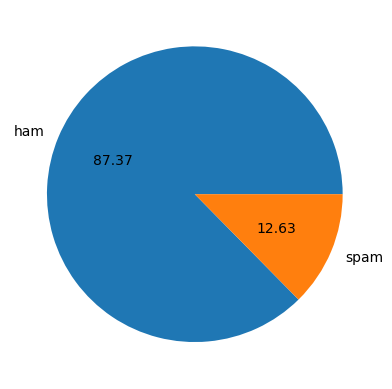

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['Class'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# Text cleaning

In [ ]:
# handle punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text="".join([char for char in text if char not in string.punctuation])
    return text

In [ ]:
data["text_clean"]=data["Messages"].apply(lambda x:remove_punct(x))

In [ ]:
data

,Class,Messages,length,text_clean
0,1,I've been searching for the right words to tha...,196,Ive been searching for the right words to than...
1,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...
2,1,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...
3,1,Even my brother is not like to speak with me. ...,77,Even my brother is not like to speak with me T...
4,1,I HAVE A DATE ON SUNDAY WITH WILL!!!,36,I HAVE A DATE ON SUNDAY WITH WILL
...,...,...,...,...
5562,0,This is the 2nd time we have tried 2 contact u...,160,This is the 2nd time we have tried 2 contact u...
5563,1,Will ü b going to esplanade fr home?,36,Will ü b going to esplanade fr home
5564,1,"Pity, * was in mood for that. So...any other s...",57,Pity was in mood for that Soany other suggest...
5565,1,The guy did some bitching but I acted like i'd...,125,The guy did some bitching but I acted like id ...


In [ ]:
data['target'].value_counts()

## Split data into X and y

In [ ]:
x=data['text_clean']
y=data['Class']

In [ ]:
y.dtypes

dtype('O')

In [ ]:
# convert object data type of class into integer
y=y.astype('int')

In [ ]:
y.dtypes

dtype('int64')

## Train and Test

In [ ]:
# Split data for tetsing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
# Apply countvectorizer method to convert categorical data into numerical by creating feature vectors
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words="english")
x_train_cv=cv.fit_transform(x_train)

In [ ]:
x_test_cv=cv.transform(x_test)

In [ ]:
x_train_cv

<4131x8150 sparse matrix of type '<class 'numpy.int64'>'
	with 31506 stored elements in Compressed Sparse Row format>

# Build Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(x_train_cv,y_train)

MultinomialNB()

In [ ]:
y_pred=model1.predict(x_test_cv)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9816069699903195

In [ ]:
# Predictions
msg=input("Enter the msg")
msginput=cv.transform([msg])
predict=model1.predict(msginput)
if (predict[0]==0):
    print("Spam")
else:
    print("Ham")


# TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x_tf=tf.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_tf,y,test_size=0.2,random_state=10)

In [ ]:
# Bernoulli model
from sklearn.naive_bayes import BernoulliNB
model2=BernoulliNB(alpha=0.01)

In [ ]:
model2.fit(x_train,y_train)

BernoulliNB(alpha=0.01)

In [ ]:
y_pred=model2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9856373429084381

In [ ]:
msg=input("Enter the msg")
msginput=tf.transform([msg])
predict=model2.predict(msginput)
if (predict[0]==0):
    print("Spam")
else:
    print("Ham")

Enter the msgHey..u won 200 rs
Spam
